# Linear Regression

I would like to explain how to implement linear regression from scratch using Python. We will first start by a one dimension problem, then a multidimensional problem.

# One feature (dimension = 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's first define the problem: <br>
 
$$
Cost function(MSE):  {J(\theta)=\frac{1}{m}\displaystyle\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2} \\
{Output:  h=\theta_0 + \theta_1x};      \space \space \theta_0 = bias\\
$$

Let's first import the data:

In [3]:
numpydata = np.loadtxt(fname="ex1data1.txt",delimiter=",")
x = numpydata[:,0]
y = numpydata[:,1]

Now let's implement the gradient descent algorithm:

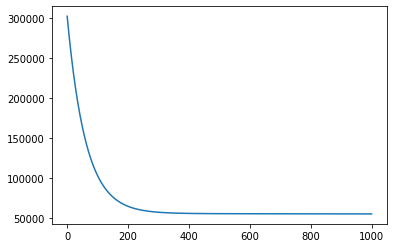

In [4]:
def train (x,y,alpha=1e-4,iterations=1000,plot=False):
    
    #train is an implementation of the gradient descent algorithm
    #the algorithm follows these steps:
    #1. Initialization of the parameters theta0 & theta1
    #Loop
    #2. Calculation of h
    #3. Calculation of J
    #4. Calculation of grad J
    #5. Actualization of the parameters theta0 & theta1
    
    #initialization of the parameters theta
    
    theta0=0 #bias always initiated at 0
    theta1=1e-3*np.random.randn()
    J_tab = []
    
    #loop
    for i in range(iterations):
        h = theta1*x +theta0
        J = 0.5*len(x)*np.sum((h-y)**2)
        dj_dtheta1 = (1/len(x))*np.dot(x.T,h-y)
        dj_dtheta0 = (1/len(x))*np.sum(h - y)            
        theta1 = theta1 - alpha * dj_dtheta1
        theta0 = theta0 - alpha * dj_dtheta0
        J_tab.append(J)
    parameters = [theta0,theta1]
    
    if (plot == True): 
        plt.plot(range(iterations), J_tab)  
        
    return [J_tab, parameters]

lr = train(x,y,plot=True)

Let's define a function predict, that for each set of values x will: <br> 
Return the R2 score <br>
Plot both the predicted values & the training data in the same graph

In [5]:
def predict(x):
    output = []
    for i in range(len(x)):
        h = parameters[0] + x[i] * parameters[1] #linear regression with one dimension
        output.append(h)
    
    y_mean = np.sum(y)/len(y)
    SSres = np.sum((y-output)**2)
    SStot = np.sum((y-y_mean)**2)
    r2 = 1 - (SSres/SStot)
    
    print('R2 is equal to', round(r2,2))
    plt.plot(x,output,'b-')
    plt.plot(x,y,'r.')
    

predict(x)
        

NameError: name 'parameters' is not defined

### Regularization term
We add a regularization term called Jreg to the cost function to avoid having an overfit. Therefore we add a bias to the cost:
J = Jdata + Jreg <br>

$$
{J_{reg}(\theta)=\frac{1}{2m}\lambda\sum_{i=1}^m\theta_i^2} \\ \lambda = { regularization  \space  term}
$$

In [ ]:
def train_reg (x,y,alpha=1e-4, iterations=1000,plot=False, reg=0):
    #reg is the regularization term
    #initialization of the parameters theta
    
    theta0=0 #bias always initiated at 0
    theta1=1e-3*np.random.randn()
    J_tab = []
    
    #loop
    for i in range(iterations):
        h = theta1*x +theta0
        #Cost function with regularization term
        Jreg = (0.5/(len(x)))*reg*theta1**2
        J = 0.5*len(x)*np.sum((h-y)**2) + Jreg
        #differentials of cost function dJ/dtheta1 & dJ/dtheta0
        dj_dtheta1_reg = (1/(len(x)))*reg*theta1
        dj_dtheta1 = (1/len(x))*np.dot(x.T,h-y) + dj_dtheta1_reg
        dj_dtheta0 = (1/len(x))*np.sum(h - y)
        #parameter and bias
        theta1 = theta1 - alpha * dj_dtheta1
        theta0 = theta0 - alpha * dj_dtheta0
        J_tab.append(J)
                  
    parameters = [theta0,theta1]
    
    if (plot == True): 
        plt.plot(range(iterations), J_tab)
        
    return [J_tab, parameters]        
        
lr = train_reg (x,y,plot=True)

In [ ]:
parameters = lr[1]
def predict(x):
    output = []
    for i in range(len(x)):
        h = parameters[0] + x[i] * parameters[1] #linear regression with one dimension
        output.append(h)
    
    y_mean = np.sum(y)/len(y)
    SSres = np.sum((y-output)**2)
    SStot = np.sum((y-y_mean)**2)
    r2 = 1 - (SSres/SStot)
    
    print('R2 is equal to', round(r2,2))
    plt.plot(x,output,'b-')
    plt.plot(x,y,'r.')
    
predict(x) #prediction with regularization term

## One dimension problem wrap-up

Let's define a class called LinearRegression to make the code easier:

In [ ]:
class LinearRegressionOneD:
    def __init__(self):
        self.theta0=0 #bias always initiated at 0
        self.theta1=1e-3*np.random.randn()
        self.costs = []
    
    def train(self,x,y,alpha=5e-4, iterations=1000,plot=False, reg=10):
        theta0 = self.theta0
        theta1 = self.theta1
        J_tab = []
        #loop
        for i in range(iterations):
            h = theta1*x +theta0
            #Cost function with regularization term
            Jreg = (0.5/(len(x)))*reg*theta1**2
            J = 0.5*len(x)*np.sum((h-y)**2) + Jreg
            #differentials of cost function dJ/dtheta1 & dJ/dtheta0
            dj_dtheta1_reg = (1/(len(x)))*reg*theta1
            dj_dtheta1 = (1/len(x))*np.dot(x.T,h-y) + dj_dtheta1_reg
            dj_dtheta0 = (1/len(x))*np.sum(h - y)
            #parameter and bias
            theta1 = theta1 - alpha * dj_dtheta1
            theta0 = theta0 - alpha * dj_dtheta0
            J_tab.append(J)
            
        self.theta0 = theta0
        self.theta1 = theta1
        self.costs=J_tab

        if (plot == True): 
            plt.plot(range(iterations), J_tab)

    def predict(self, x):
        theta0 = self.theta0
        theta1 = self.theta1
        output = []
        for i in range(len(x)):
            h = theta0 + x[i] * theta1 #linear regression with one dimension
            output.append(h)

        y_mean = np.sum(y)/len(y)
        SSres = np.sum((y-output)**2)
        SStot = np.sum((y-y_mean)**2)
        r2 = 1 - (SSres/SStot)

        print('R2 is equal to', round(r2,2))
        plt.plot(x,output,'b-')
        plt.plot(x,y,'r.')
        
lr = LinearRegressionOneD()   
lr.train(x,y,plot=True)        

In [ ]:
def r2_score(output,y) :
    y_mean = np.mean(y)
    SSres = np.sum((y-output)**2)
    SStot = np.sum((y-y_mean)**2)
    r2 = 1 - (SSres/SStot)
    return r2

In [6]:
lr.predict(x)

AttributeError: 'list' object has no attribute 'predict'

# Multiple features (dimension = n)

Let's now consider the problem with n dimension (n features)

Let's practice with data

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#Import data for multivariable linear regression
numpydata = np.loadtxt(fname="multivariable.txt",delimiter=",")
X = numpydata[:,0:2]
y = numpydata[:,2]
sample_size = X.shape[0]
X_copy = np.copy(X)
np.random.shuffle(X_copy) #mix the data randomly
y_copy = np.copy(y)
np.random.shuffle(y_copy)

#Divide data between training set (4/5) and testing set (1/5)
X_train, X_test = X_copy[:4*round(sample_size/5),:], X_copy[4*round(sample_size/5):,:]
y_train, y_test = y_copy[:4*round(47/5)], y_copy[4*round(47/5):]

X_train.shape, X_test.shape

((36, 2), (11, 2))

NameError: name 'r2_score' is not defined

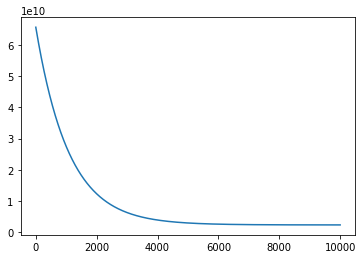

In [9]:
def train (X,y,alpha=1e-10, plot=False, iterations=10000):
    #find the dimension D and number of samples m
    D = X.shape[1]
    m = X.shape[0]
    
    #initialization of the parameters
    theta0 = 0
    theta = 1e-3*np.random.randn(D) #vector of dimension D
    
    #Gradient descent algorithm
    J_tab = []
    for i in range(iterations):
        h = np.dot(X,theta) + theta0#vector of dimension m number of samples
        J = (0.5/m)*np.dot((h-y).T,h-y) #real value
        #gradient calculation
        dJ_dtheta = np.dot(X.T,h-y)/m #vector of dimension n
        dJ_dtheta0 = (1/m)*np.sum(h - y)
        #parameters actualization
        theta = theta - alpha * dJ_dtheta
        theta0 = theta0 - alpha*dJ_dtheta0
        #saving values of the cost to plot the graph
        J_tab.append(J)
        #print(theta)
    
    #print(J_tab)
    if(plot==True):
        plt.plot(range(iterations), J_tab)
        
    return theta0, theta, h, r2_score(h,y)

lr = train (X,y, plot=True)
#print(lr)

Let's create a function that gives the best alpha out of a list of candidates. 

In [ ]:
def best_alpha(alpha_list):
    best_r2 = 0
    best_alpha = 0
    for alpha in learning_rates :
        _,_,h,r2 = train(X,y,alpha=alpha,plot=False)
        print(f"For alpha = {alpha} : R2 = {r2}")
        if r2 > best_r2 :
            best_alpha = alpha
    print(f"\nBest alpha : {alpha}\n")

learning_rates = [5e-10, 7.5e-10, 1e-9, 1e-8]
best_alpha(learning_rates)

Let's now create a class called LinearRegression that regroups all of the functions seen above. This time this class would be applied to both one dimensional and multidimensional problems.

PROBLEM FOR SCORE FUNCTION
BEST ALPHA FUNCTION NOT CHECKED
ADD REGULARIZATION TERM

-1.6447732288666352

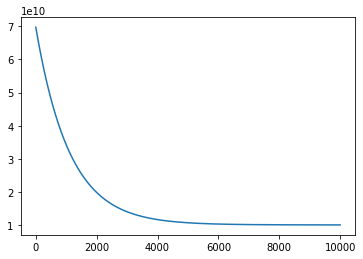

In [11]:
class LinearRegression:
    def __init__(self):
        self.theta0=0 #bias 
        self.theta=[] #parameters
        self.costs = [] #cost values
    
    def train (self,X,y,alpha=1e-10, plot=False, iterations=10000):
        #find the dimension D and number of samples m
        D = X.shape[1]
        m = X.shape[0]
        
        #initialization of the parameters
        theta0=self.theta0
        theta=self.theta
        theta0 = 0
        theta = 1e-3*np.random.randn(D) #vector of dimension D

        #Gradient descent algorithm
        J_tab = []
        for i in range(iterations):
            h = np.dot(X,theta) + theta0 #vector of dimension m number of samples
            J = (0.5/m)*np.dot((h-y).T,h-y) #real value
            #gradient calculation
            dJ_dtheta = np.dot(X.T,h-y)/m #vector of dimension n
            dJ_dtheta0 = (1/m)*np.sum(h - y)
            #parameters actualization
            theta = theta - alpha * dJ_dtheta
            theta0 = theta0 - alpha*dJ_dtheta0
            #saving values of the cost to plot the graph
            J_tab.append(J)
        
        #update values in self object
        self.theta0=theta0
        self.theta = theta
        self.costs=J_tab
        
        if(plot==True):
            plt.plot(range(iterations), J_tab)
            

    def predict(self, X, plot=False):
        theta0 = self.theta0
        theta = self.theta
        h = np.dot(X,theta) + theta0 #linear regression with multidimension
        return h

    
    def score(self,X,y):
        theta0 = self.theta0
        theta = self.theta
        output = np.dot(X,theta) + theta0 #linear regression with multidimension
        #r2 calculation
        y_mean = np.mean(y)
        SSres = np.sum((y-output)**2)
        SStot = np.sum((y-y_mean)**2)
        r2 = 1 - (SSres/SStot)
            
        return r2
    
    def best_alpha(self, alpha_list,X,y):
        h=self.h
        r2=score(X,y)
        best_r2 = 0
        best_alpha = 0
        for alpha in alpha_list :
            print(f"For alpha = {alpha} : R2 = {r2}")
            if r2 > best_r2 :
                best_alpha = alpha
        print(f"\nBest alpha : {alpha}\n")

lr = LinearRegression()   
lr.train(X_train,y_train,plot=True)
lr.predict(X_test)
lr.score(X_test,y_test)